In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import calinski_harabasz_score, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import helper_funcs as my_funcs
import math
%matplotlib inline

In [39]:
alvaDescFP = pd.read_csv("alvaDesc/ECFP_1024_m0-3_b2_c_de_salted.txt", sep='\t', header=0).reset_index().rename(columns={"Extended Connectivity FINGERPRINTS - size:1024 - length:0 to 3 - bits per pattern:2 - count fragments - atom options:Atom type|Aromaticity|Connectivity (total)|Charge|Bond order": "level_1024"}).drop("level_0", axis='columns')
alvaDescFP.to_csv("alvaDesc/alvaDesc_fp_de_salted.csv")

C:\Users\clarkep\AppData\Local\Temp\ipykernel_7876\1468379942.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  alvaDescFP = pd.read_csv("alvaDesc/ECFP_1024_m0-3_b2_c_de_salted.txt", sep='\t', header=0).reset_index().rename(columns={"Extended Connectivity FINGERPRINTS - size:1024 - length:0 to 3 - bits per pattern:2 - count fragments - atom options:Atom type|Aromaticity|Connectivity (total)|Charge|Bond order": "level_1024"}).drop("level_0", axis='columns')
C:\Users\clarkep\AppData\Local\Temp\ipykernel_7876\1468379942.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

In [40]:
device_fp = pd.read_csv("DBVersions/device_fp_plus_cosensclust.csv", index_col=0)
device_fp

,Used Co-adsorbent,Electrolyte_0.005 M isopropanol solution of H2PtCl6·6H2O,Electrolyte_AN-50,Electrolyte_Bromide_Tribromide,Electrolyte_Co(II)_Co(III),Electrolyte_Cu(I)_Cu(II),"Electrolyte_DHS-Z23, Heptachroma",Electrolyte_DMPIC_DMPIDC,Electrolyte_Dyesol Mixes,"Electrolyte_EMISCN, K(SeCN)3, GuanThio, NMB",...,"Co-adsorbent Conc. (mM)_(1476.0, 1967.667]","Co-adsorbent Conc. (mM)_(1967.667, 2459.333]","Co-adsorbent Conc. (mM)_(2459.333, 2951.0]","Co-adsorbent Conc. (mM)_(2951.0, 3442.667]","Co-adsorbent Conc. (mM)_(3442.667, 3934.333]","Co-adsorbent Conc. (mM)_(3934.333, 4426.0]",CoSensCluster_0,CoSensCluster_1,CoSensCluster_2,CoSensCluster_None
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [46]:
dye_fp = pd.read_csv("DBVersions/rdkit_fp_de_salted.csv", index_col=0)
dye_fp

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [47]:
dye_device_fp = pd.concat([dye_fp, device_fp], axis=1)
dye_device_fp

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,"Co-adsorbent Conc. (mM)_(1476.0, 1967.667]","Co-adsorbent Conc. (mM)_(1967.667, 2459.333]","Co-adsorbent Conc. (mM)_(2459.333, 2951.0]","Co-adsorbent Conc. (mM)_(2951.0, 3442.667]","Co-adsorbent Conc. (mM)_(3442.667, 3934.333]","Co-adsorbent Conc. (mM)_(3934.333, 4426.0]",CoSensCluster_0,CoSensCluster_1,CoSensCluster_2,CoSensCluster_None
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [48]:
pce = pd.read_csv("DBVersions/clarke_DSSCDB.csv")["PCE"]
pce

0       5.19
1       2.60
2       3.10
3       2.20
4       5.00
        ... 
4421    8.79
4422    4.52
4423    6.09
4424    5.65
4425    5.21
Name: PCE, Length: 4426, dtype: float64

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(dye_device_fp, pce, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_train, Y_train)

pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

train_df = pd.DataFrame.from_dict({'True': Y_train, 'Predicted': pred_train})
test_df = pd.DataFrame.from_dict({'True': Y_test, 'Predicted': pred_test})


# ---- train results ----
r2 = r2_score(Y_train, pred_train)
train_mae = mean_absolute_error(Y_train, pred_train)

# ---- test results ----
q2 = r2_score(Y_test, pred_test)
test_mae = mean_absolute_error(Y_test, pred_test)

Text(0.5, 1.0, 'Test Set: q2 -> 0.75, mae -> 0.94')

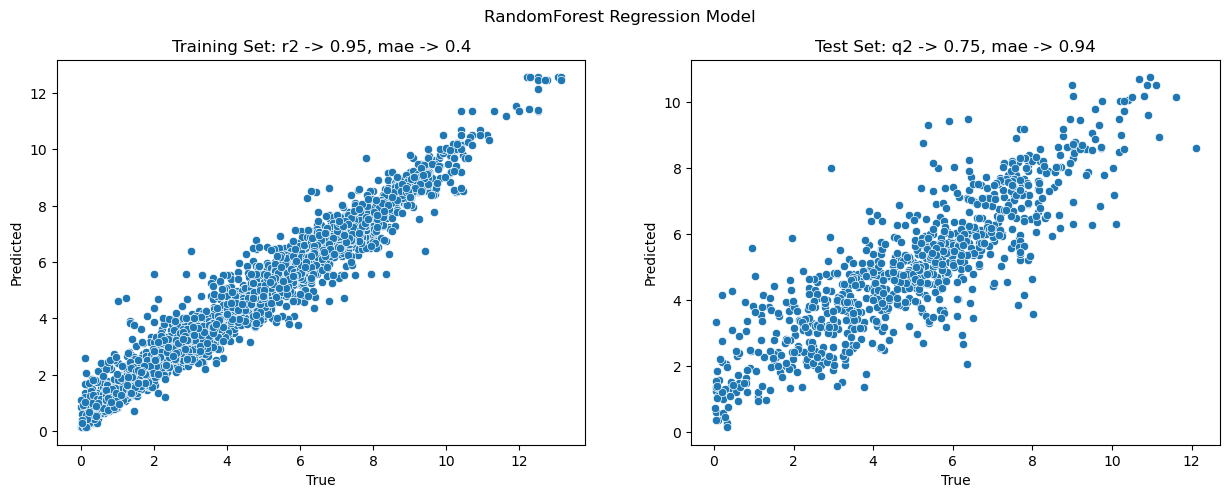

In [82]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('RandomForest Regression Model')

# Training Set Results
sns.scatterplot(ax=axes[0], data=train_df, x='True', y='Predicted')
axes[0].set_title(f"Training Set: r2 -> {round(r2,2)}, mae -> {round(train_mae, 2)}")

# Test Set Results
sns.scatterplot(ax=axes[1], data=test_df, x='True', y='Predicted')
axes[1].set_title(f"Test Set: q2 -> {round(q2, 2)}, mae -> {round(test_mae, 2)}")

In [76]:
counted_fp = pd.read_csv("alvaDesc/ECFP_1024_m0-3_b2_c_table_de_salted.txt", sep='\t').drop(["No.", "NAME", "Unnamed: 9240"], axis=1)
counted_fp

,[B;X4;-],[Br;X1],[C;X1;-],[C;X2],[C;X3;+],[C;X3],[C;X4],[Cl;X1],[F;X1],[Fe;X2],...,[s;X2][c;X3]1[s;X2][c;X3]([c;X3][c;X3]1[c;X3])-[c;X3]1[s;X2][c;X3][c;X3][c;X3]1,[se;X2]1[c;X3](-[c;X3])[c;X3][c;X3][c;X3]1-[c;X3]([c;X3])[c;X3],[se;X2]1[c;X3](-[c;X3])[c;X3][c;X3][c;X3]1-[c;X3]([c;X3][c;X3])[c;X3][c;X3],[se;X2]1[c;X3]([c;X3][c;X3][c;X3]1-[c;X3]([c;X3])[c;X3])-[c;X3]([c;X3])[c;X3],[se;X2]1[c;X3][c;X3][c;X3][c;X3]1-[c;X3]1[c;X3][c;X3][c;X3][c;X3][c;X3]1,[se;X2]1[c;X3][c;X3][c;X3][c;X3]1-[c;X3]1[se;X2][c;X3](-[c;X3])[c;X3][c;X3]1,[se;X2]1[c;X3][n;X3;+][c;X3]2[c;X3][c;X3][c;X3][c;X3][c;X3]12,[se;X2][c;X3]([c;X3])-[c;X3]1[se;X2][c;X3](-[c;X3])[c;X3][c;X3]1,[se;X2][c;X3]([c;X3])-[c;X3]1[se;X2][c;X3]([c;X3][c;X3]1)-[c;X3]([c;X3])[c;X3],[se;X2][c;X3]1[c;X3][c;X3][c;X3][c;X3][c;X3]1
0,0,0,0,4,0,10,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,13,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,13,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,13,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,13,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,0,0,0,2,0,4,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4422,0,0,0,1,0,3,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4423,0,0,0,3,0,9,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4424,0,0,0,3,0,9,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
dye_device_counted_fp = pd.concat([counted_fp, device_fp], axis=1)


In [84]:
dye_device_counted_fp

,[B;X4;-],[Br;X1],[C;X1;-],[C;X2],[C;X3;+],[C;X3],[C;X4],[Cl;X1],[F;X1],[Fe;X2],...,"Co-adsorbent Conc. (mM)_(1476.0, 1967.667]","Co-adsorbent Conc. (mM)_(1967.667, 2459.333]","Co-adsorbent Conc. (mM)_(2459.333, 2951.0]","Co-adsorbent Conc. (mM)_(2951.0, 3442.667]","Co-adsorbent Conc. (mM)_(3442.667, 3934.333]","Co-adsorbent Conc. (mM)_(3934.333, 4426.0]",CoSensCluster_0,CoSensCluster_1,CoSensCluster_2,CoSensCluster_None
0,0,0,0,4,0,10,6,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,13,8,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,13,8,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,13,8,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,13,8,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,0,0,0,2,0,4,20,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4422,0,0,0,1,0,3,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4423,0,0,0,3,0,9,14,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4424,0,0,0,3,0,9,14,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(dye_device_counted_fp, pce, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_train, Y_train)

pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

train_df = pd.DataFrame.from_dict({'True': Y_train, 'Predicted': pred_train})
test_df = pd.DataFrame.from_dict({'True': Y_test, 'Predicted': pred_test})


# ---- train results ----
r2 = r2_score(Y_train, pred_train)
train_mae = mean_absolute_error(Y_train, pred_train)

# ---- test results ----
q2 = r2_score(Y_test, pred_test)
test_mae = mean_absolute_error(Y_test, pred_test)

Text(0.5, 1.0, 'Test Set: q2 -> 0.74, mae -> 0.95')

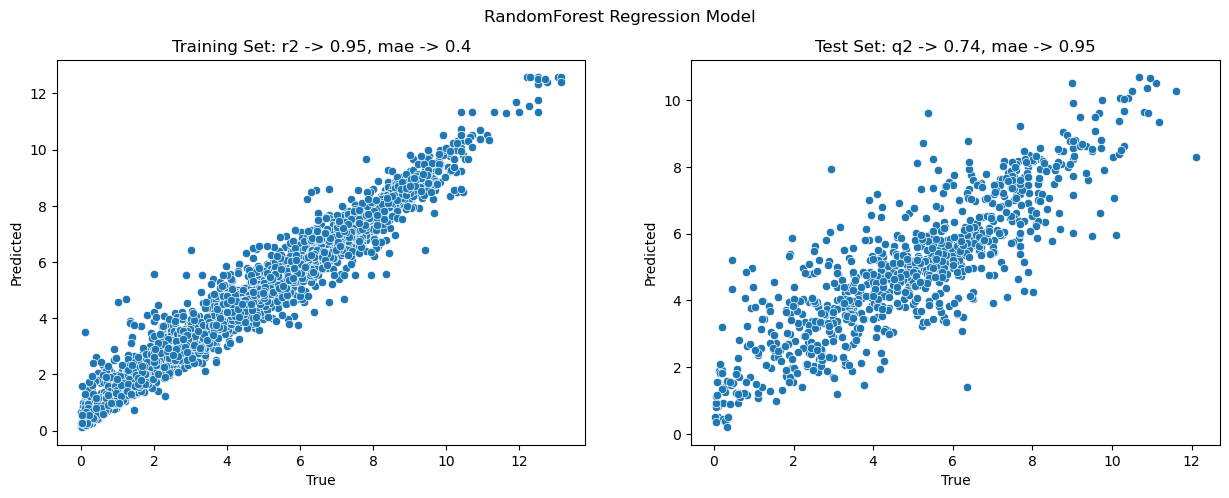

In [86]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('RandomForest Regression Model')

# Training Set Results
sns.scatterplot(ax=axes[0], data=train_df, x='True', y='Predicted')
axes[0].set_title(f"Training Set: r2 -> {round(r2,2)}, mae -> {round(train_mae, 2)}")

# Test Set Results
sns.scatterplot(ax=axes[1], data=test_df, x='True', y='Predicted')
axes[1].set_title(f"Test Set: q2 -> {round(q2, 2)}, mae -> {round(test_mae, 2)}")